In [3]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
news_data_path = 'processed_analyst_ratings.csv'  # Path to news dataset
stock_data_path = 'AAPL_processed_data.csv'  # Path to stock data

news_data = pd.read_csv(news_data_path)
stock_data = pd.read_csv(stock_data_path)

In [7]:
# Parse and normalize dates
news_data['date'] = pd.to_datetime(news_data['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce').dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

In [8]:
# Align datasets by date
aligned_data = news_data.groupby('date').agg({'headline': ' '.join}).reset_index()
aligned_data = pd.merge(aligned_data, stock_data, left_on='date', right_on='Date', how='inner')

# Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

aligned_data['sentiment'] = aligned_data['headline'].apply(analyze_sentiment)


In [9]:
# Calculate Daily Stock Returns
aligned_data['daily_return'] = aligned_data['Close'].pct_change()

# Correlation Analysis
correlation = aligned_data[['sentiment', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between sentiment and daily returns: {correlation}")


Correlation between sentiment and daily returns: 0.004668988489077947


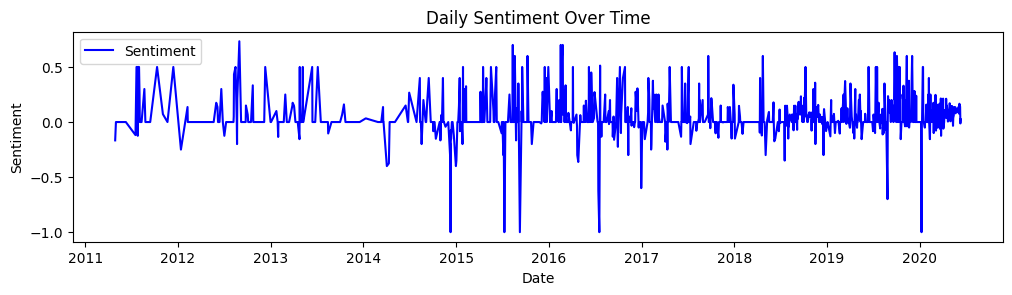

In [10]:
# Visualization
plt.figure(figsize=(12, 6))

# Plot sentiment over time
plt.subplot(2, 1, 1)
plt.plot(aligned_data['date'], aligned_data['sentiment'], label='Sentiment', color='blue')
plt.title('Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()

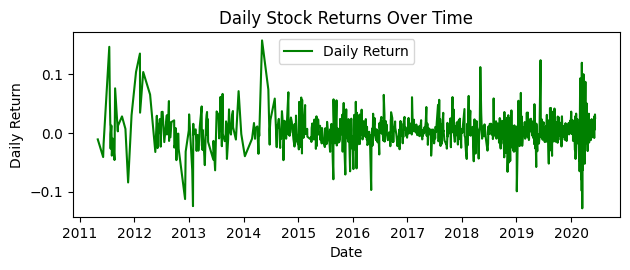

In [11]:
# Plot daily returns over time
plt.subplot(2, 1, 2)
plt.plot(aligned_data['date'], aligned_data['daily_return'], label='Daily Return', color='green')
plt.title('Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Save aligned data for further use
aligned_data.to_csv('/content/aligned_news_stock_data.csv', index=False)
